In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
%matplotlib inline

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
print("Shape of the data is(row , column):"+ str(df.shape) )
print(df.info())

Shape of the data is(row , column):(215, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


In [5]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

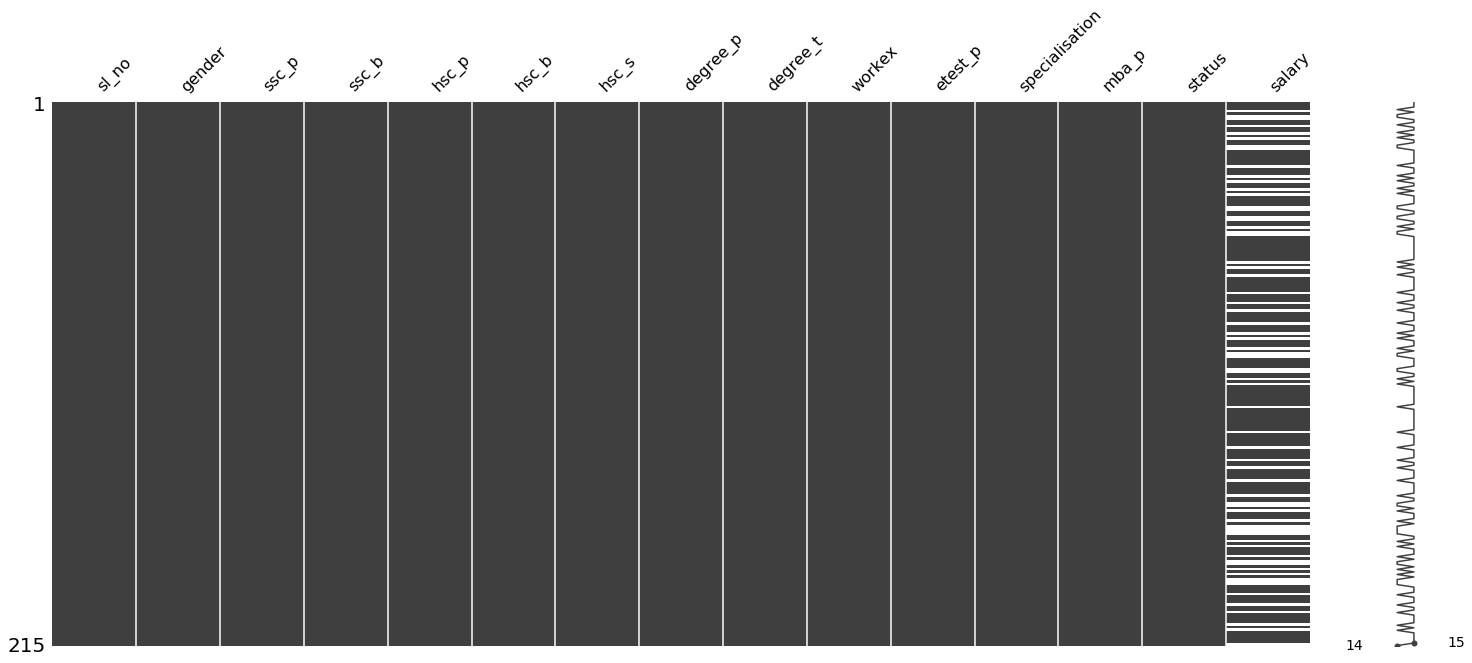

In [6]:
#checking for missing data
import missingno as msno
msno.matrix(df)


In [7]:
#checking number of missing values
print("Number of null values :" ,df.isnull().sum(), sep = '\n')

Number of null values :
sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


In [8]:
df['salary'].fillna(value = 0 , inplace = True)
print("Salary with null value:", df['salary'].isnull().sum(),sep ='\n')

Salary with null value:
0


In [9]:
df.drop(['sl_no','ssc_b','hsc_b'],axis = 1,inplace = True)
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


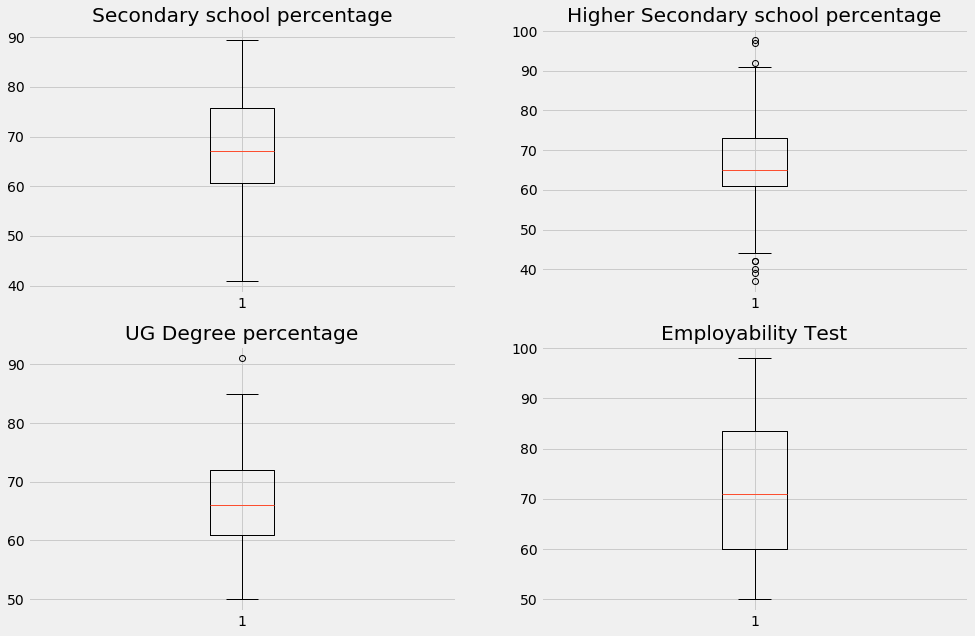

In [14]:
#removing outliers 
plt.figure(figsize = (15,10))
plt.style.use('fivethirtyeight')
ax = plt.subplot(221)
plt.boxplot(df['ssc_p'])
ax.set_title('Secondary school percentage')
ax = plt.subplot(222)
plt.boxplot(df['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax = plt.subplot(223)
plt.boxplot(df['degree_p'])
ax.set_title('UG Degree percentage')
ax = plt.subplot(224)
plt.boxplot(df['etest_p'])
ax.set_title('Employability Test')
plt.savefig('Outlier.png')

In [16]:
Q1 = df['hsc_p'].quantile(0.25)
Q3 = df['hsc_p'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['hsc_p'] >= Q1 - 1.5 * IQR) & (df['hsc_p'] <= Q3 + 1.5 *IQR)
placement_filtered=df.loc[filter]

Text(0.5, 1.0, 'After Removing outliers(hsc_p)')

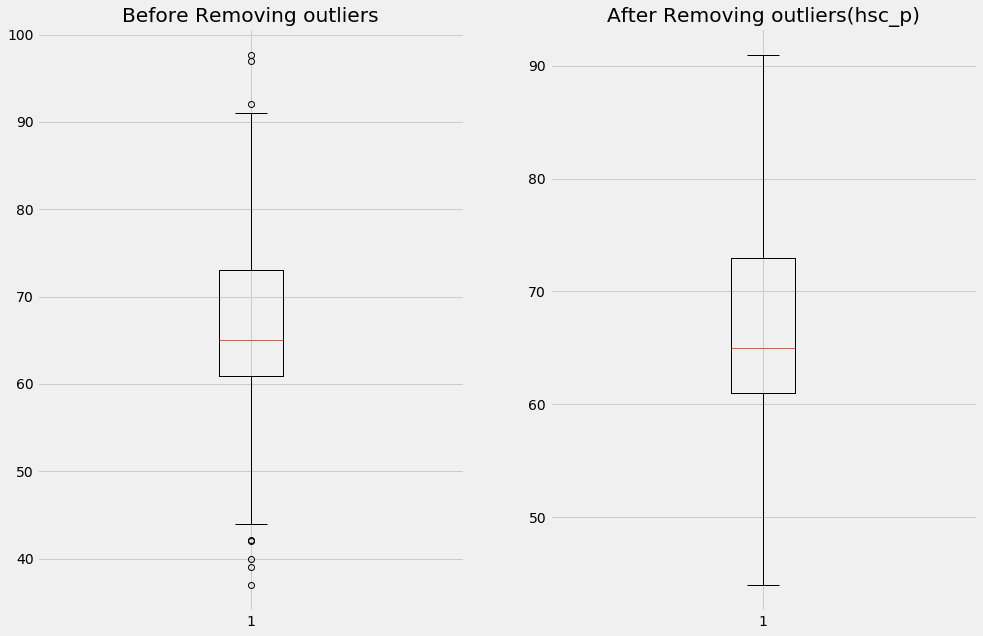

In [25]:
plt.figure(figsize = (15,10))
plt.style.use('fivethirtyeight')
ax = plt.subplot(121)
plt.boxplot(df['hsc_p'])
ax.set_title('Before Removing outliers')
ax = plt.subplot(122)
plt.boxplot(placement_filtered['hsc_p'])
ax.set_title('After Removing outliers(hsc_p)')
#plt.savefig('Before-After Outliers.png')



[Text(0, 0, 'M'), Text(0, 0, 'F')]

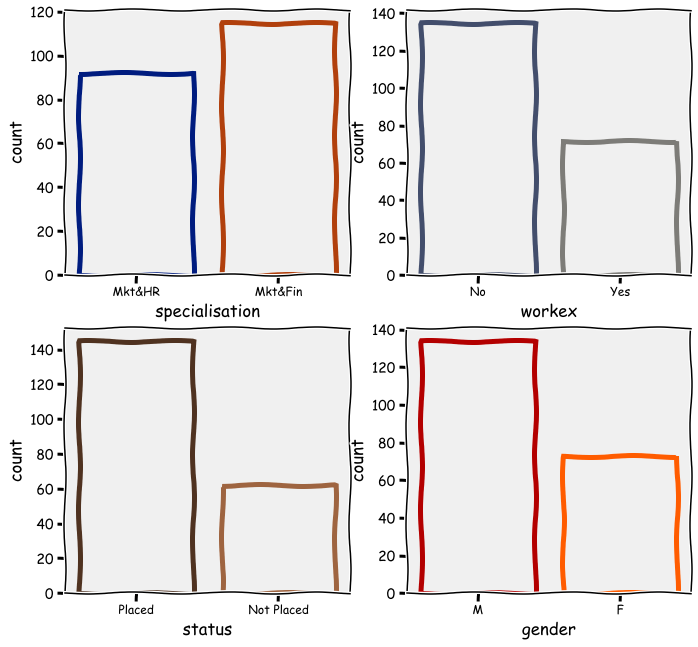

In [45]:
plt.figure(figsize=(15,7))
#specialization
#plt.style.use('fivethirtyeight')
plt.xkcd()
plt.subplot(221)
ax = sns.countplot(x = 'specialisation', data= placement_filtered , 
                     linewidth=5,facecolor= (0,0,0,0), edgecolor = sns.color_palette("dark", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(222)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#placementstatus
plt.subplot(223)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Gender
plt.subplot(224)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)


[Text(0, 0, 'Commerce'), Text(0, 0, 'Science'), Text(0, 0, 'Arts')]

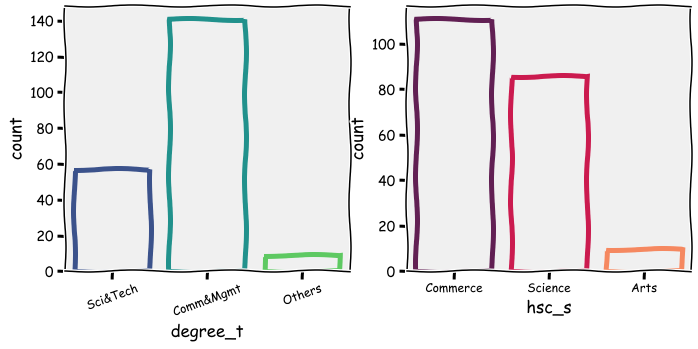

In [47]:
#Degree type
plt.subplot(221)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#higher secondary school degree specialization(pcm,commerce,arts)
plt.subplot(222)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

[Text(0.5, 0, '')]

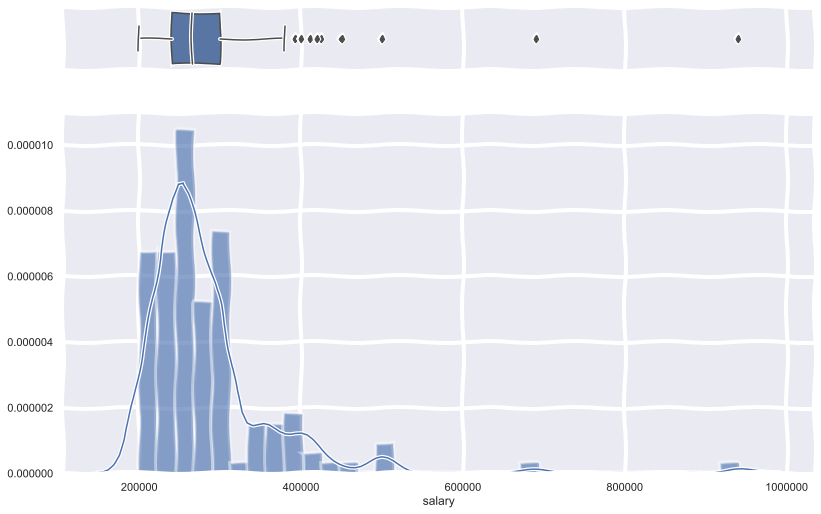

In [54]:
# salary distribution

sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)

 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
 
